In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
titanic = pd.read_csv(r"C:\Users\Mg\Downloads\titanic.csv")

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("\nDataset Info:")
titanic.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.shape
titanic.describe()  

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Count missing values per column
titanic.isnull().sum()

# Fill missing 'Age' with median
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

# Fill missing 'Embarked' with most frequent value (mode)
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])



In [6]:
titanic.drop_duplicates(inplace=True)


In [7]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = titanic['Fare'].quantile(0.25)
Q3 = titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
titanic_cleaned_fare = titanic[(titanic['Fare'] >= lower_bound) & (titanic['Fare'] <= upper_bound)]

# Repeat for Age (if needed)
Q1_age = titanic['Age'].quantile(0.25)
Q3_age = titanic['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Filter out the outliers
titanic_cleaned_age = titanic_cleaned_fare[(titanic_cleaned_fare['Age'] >= lower_bound_age) & (titanic_cleaned_fare['Age'] <= upper_bound_age)]


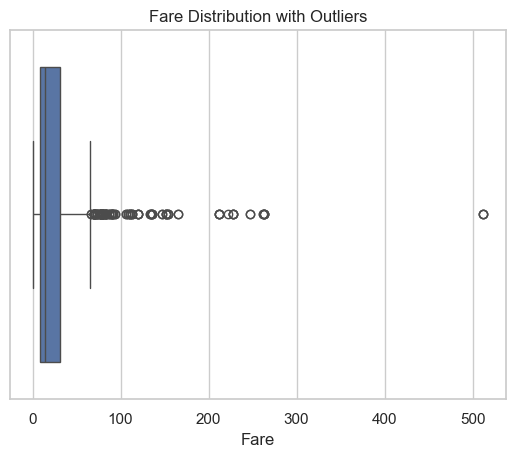

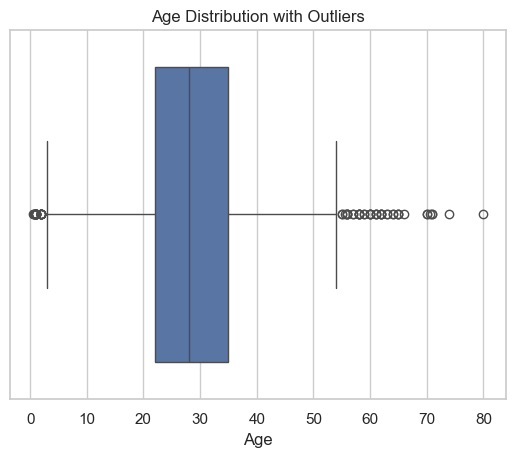

In [13]:
# Boxplot to visualize Fare outliers
sns.boxplot(x=titanic['Fare'])
plt.title('Fare Distribution with Outliers')
plt.show()

# Boxplot to visualize Age outliers
sns.boxplot(x=titanic['Age'])
plt.title('Age Distribution with Outliers')
plt.show()


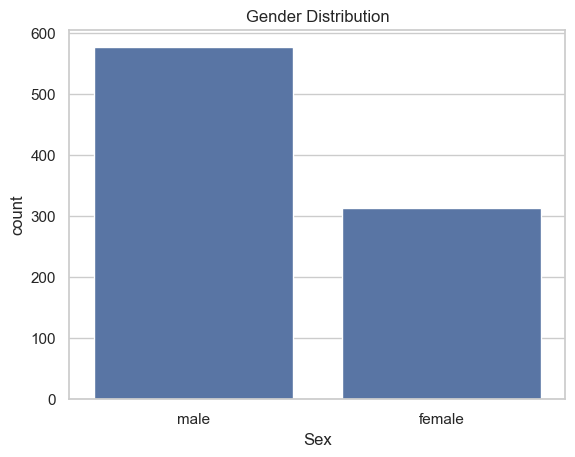

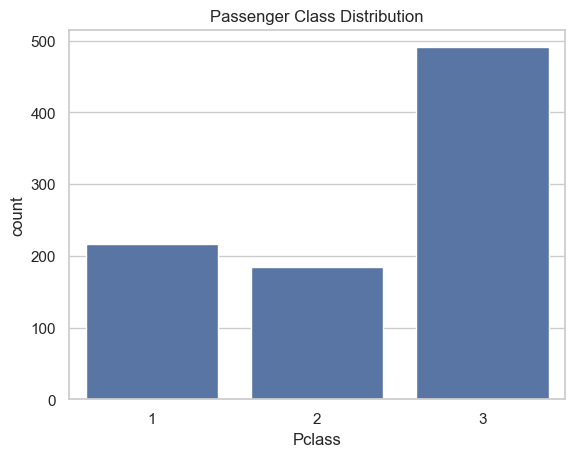

In [8]:
sns.countplot(x='Sex', data=titanic)
plt.title("Gender Distribution")
plt.show()

sns.countplot(x='Pclass', data=titanic)
plt.title("Passenger Class Distribution")
plt.show()


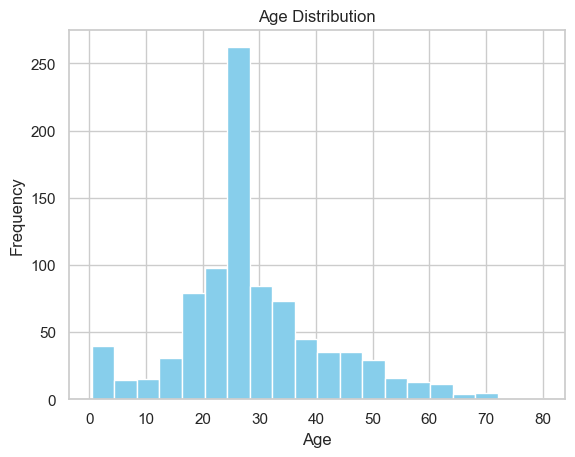

In [9]:
titanic['Age'].hist(bins=20, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


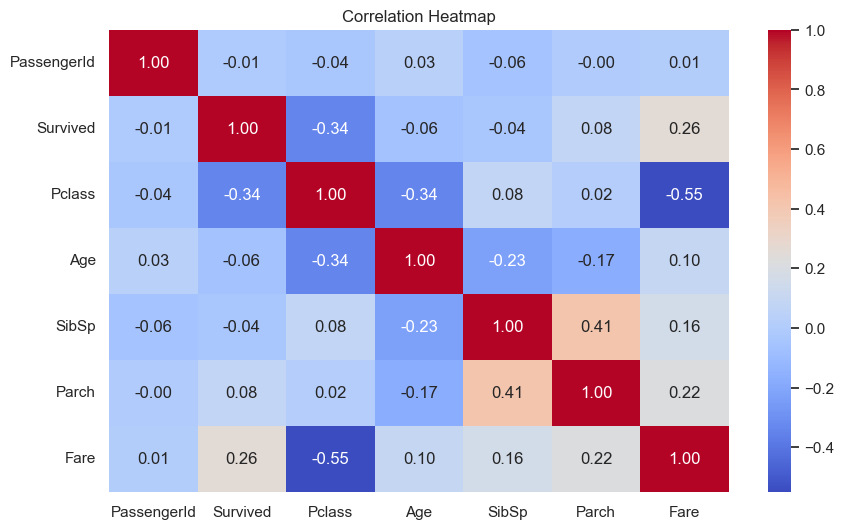

In [10]:
numeric_df = titanic.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


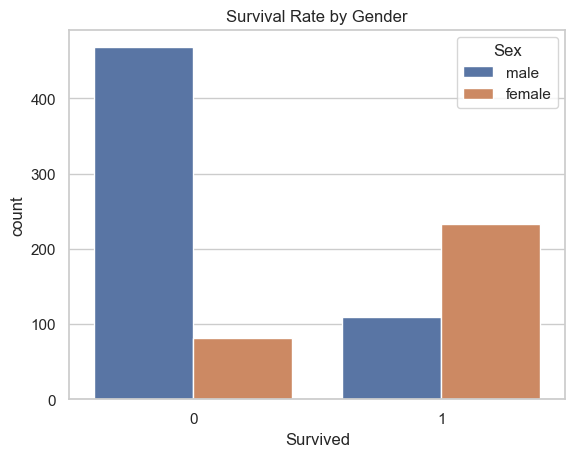

In [11]:
# Survival rate by sex
sns.countplot(x='Survived', hue='Sex', data=titanic)
plt.title("Survival Rate by Gender")
plt.show()


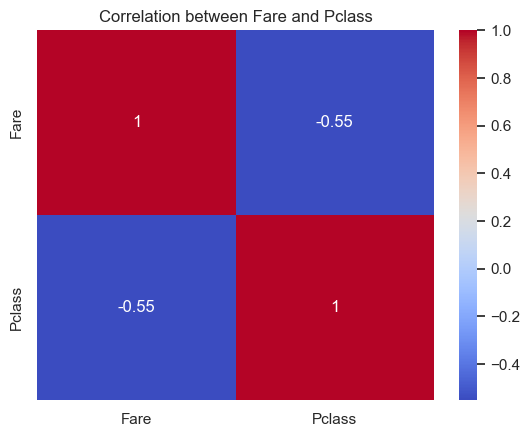

In [12]:
# Correlation heatmap
sns.heatmap(titanic[['Fare', 'Pclass']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Fare and Pclass")
plt.show()


### Insights:
- Majority of passengers were in 3rd class.
- Female passengers had a higher survival rate.
- `Fare` is negatively correlated with `Pclass`.
- Missing Data: Age had some missing values, but these were filled with the median value, and Embarked had missing values that were filled with the most frequent category.
- Age Distribution: The distribution of ages showed peaks at younger age groups, especially children